In [2]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 52.8 MB 19.3 MB/s eta 0:00:01


In [3]:
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [12]:
import os
import SimpleITK as sitk
# import nibabel as nib
import copy
import numpy as np
from glob import glob
import time
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import pandas as pd
import cv2
import natsort
import matplotlib.colors as mcolors
import seaborn as sns
import warnings

In [2]:
ROOT_PATH = './prostate_raw/'

mask_files = natsort.natsorted(glob(ROOT_PATH + '*/*_segmentation.nii.gz'))
image_files = natsort.natsorted([file.replace('_segmentation', '') for file in mask_files])
image_files

['./prostate_raw/BIDMC/Case00.nii.gz',
 './prostate_raw/BIDMC/Case02.nii.gz',
 './prostate_raw/BIDMC/Case03.nii.gz',
 './prostate_raw/BIDMC/Case04.nii.gz',
 './prostate_raw/BIDMC/Case05.nii.gz',
 './prostate_raw/BIDMC/Case06.nii.gz',
 './prostate_raw/BIDMC/Case07.nii.gz',
 './prostate_raw/BIDMC/Case08.nii.gz',
 './prostate_raw/BIDMC/Case09.nii.gz',
 './prostate_raw/BIDMC/Case10.nii.gz',
 './prostate_raw/BIDMC/Case11.nii.gz',
 './prostate_raw/BIDMC/Case12.nii.gz',
 './prostate_raw/BMC/Case00.nii.gz',
 './prostate_raw/BMC/Case01.nii.gz',
 './prostate_raw/BMC/Case02.nii.gz',
 './prostate_raw/BMC/Case03.nii.gz',
 './prostate_raw/BMC/Case04.nii.gz',
 './prostate_raw/BMC/Case05.nii.gz',
 './prostate_raw/BMC/Case06.nii.gz',
 './prostate_raw/BMC/Case07.nii.gz',
 './prostate_raw/BMC/Case08.nii.gz',
 './prostate_raw/BMC/Case09.nii.gz',
 './prostate_raw/BMC/Case10.nii.gz',
 './prostate_raw/BMC/Case11.nii.gz',
 './prostate_raw/BMC/Case12.nii.gz',
 './prostate_raw/BMC/Case13.nii.gz',
 './prostate_r

In [4]:
dataname = 'Prostate'
client_names = ['BIDMC', 'BMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
ROOT_PATH = './prostate_raw/'

In [68]:
for idx, name in enumerate(client_names):
    '''read files'''
    mask_files = natsort.natsorted(glob(ROOT_PATH + f'{name}/*_segmentation.nii.gz'))
    image_files = natsort.natsorted([file.replace('_segmentation', '') for file in mask_files])
    print(f'Client:{idx+1};', f'Patients:{len(image_files)}')
    #counts
    num = 0
    for data_idx, (img_file, mask_file) in enumerate(zip(image_files, mask_files)):
        img = sitk.ReadImage(img_file)
        mask = sitk.ReadImage(mask_file)
        #to numpy 
        img_arr = sitk.GetArrayFromImage(img)
        mask_arr = sitk.GetArrayFromImage(mask)
        
        #expand dims
        img_expn = np.expand_dims(img_arr, axis=-1)
        #duplicate to 3 channels, shape: (slices, 384, 384, 3)
        img_rep = np.concatenate([img_expn, img_expn, img_expn], axis=-1)
        #mask shape: (slices, 384, 384, 1)
        mask_expn = np.expand_dims(mask_arr, axis=-1)
        
        #split to single slice
        for (img_slice, mask_slice) in zip(img_rep, mask_expn):
            
            #concat image and mask
            data_og = np.concatenate((img_slice, mask_slice), axis=-1)

            #original image
            np.save('./{}/client{}/data_npy/sample{}'.format(dataname, idx+1, num), data_og)
            num += 1

Client:1; Patients:12
Client:2; Patients:30
Client:3; Patients:12
Client:4; Patients:19
Client:5; Patients:30
Client:6; Patients:13


## Plot data distribution

Client:1; Patients:12
Client:2; Patients:30
Client:3; Patients:12
Client:4; Patients:19
Client:5; Patients:30
Client:6; Patients:13


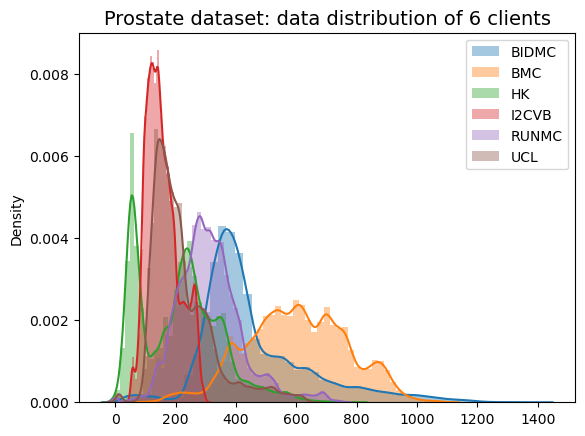

In [19]:
for idx, name in enumerate(client_names):
    '''read files'''
    mask_files = natsort.natsorted(glob(ROOT_PATH + f'{name}/*_segmentation.nii.gz'))
    image_files = natsort.natsorted([file.replace('_segmentation', '') for file in mask_files])
    print(f'Client:{idx+1};', f'Patients:{len(image_files)}')

    empty_arr = np.zeros((1,384,384))
    cnt = 0
    for data_idx, (img_file, mask_file) in enumerate(zip(image_files, mask_files)):
        img = sitk.ReadImage(img_file)
        #to numpy 
        img_arr = sitk.GetArrayFromImage(img)
        #np.mean(img_arr, axis=0)
        empty_arr[0] += np.sum(img_arr,0)
        cnt += img_arr.shape[0]
        
    mean_arr = empty_arr/cnt
    warnings.filterwarnings('ignore')
    ax = sns.distplot(mean_arr, label=f'{name}')
ax.legend()
plt.title('Prostate dataset: data distribution of 6 clients', fontsize=14)
plt.show() 

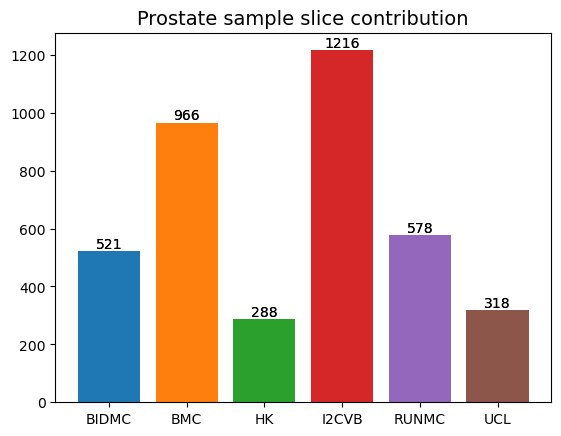

In [18]:
fig, ax = plt.subplots()
sample_size = [521, 966, 288, 1216, 578, 318]
bars = ax.bar(client_names, sample_size, color=mcolors.TABLEAU_COLORS)
ax.set_title('Prostate sample slice contribution', fontsize=14)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

In [98]:
samp1 = np.load('./Prostate/client5/data_npy/sample200.npy')
np.unique(samp1.transpose(2,0,1)[3])

array([0., 1., 2.], dtype=float32)